# Multivariate Data Analysis Exercises

This is the second exercise notebook you are going to work on in this course. 
In this notebook, we will ask you to write and execute your own code. 
Questions involved cover concepts of summary statistics, bivariate and multivariate analysis and basics of regression. 
Questions will be similar to what is discussed in Labs and Practices, 
including the extra sets of notebooks. 
The dataset used will be similar to what you have seen in lab and practice notebooks. 

In this exercise notebook, you will be dealing with housing dataset. 
Be sure to follow the directions carefully. 
Write as well as execute code in the designated cells and save the file.

**Question 1**: Read in the file `/dsa/data/all_datasets/housing/housing.txt` Name this data frame "`housing_data`".

In [12]:
# Execute your code for question 1 here
# -------------------------------------
housing_data <- read.delim('/dsa/data/all_datasets/housing/housing.txt', sep = '')
head(housing_data)
 

,X0.00632,X18.00,X2.310,X0,X0.5380,X6.5750,X65.20,X4.0900,X1,X296.0,X15.30,X396.90,X4.98,X24.00
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


The dataset doesn't have column headers. 
Since this is a small dataset we can add the names manually. 
If the dataset contains hundreds of columns then we have to get the names programmatically from dataset description files.

**Question 2**: The below is the associated **readme** file with information on getting column names of housing_data. 
The column names are listed under attribute information heading in the file. 
Now, put the names into a vector called `headers`. 
Assign the values in headers to housing_data as its column names.



```
1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley,
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.
       
4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.
```

In [13]:
# Execute your code for question 2 here
# -------------------------------------
colnames(housing_data) <- c('CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV')

In [68]:
housing_data

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


Of the 14 variables in the dataset, `MEDV` is the dependent variable while the other 13 are independent variables.  
`MEDV` reports the median value of owner-occupied homes. 
The independent variables help to explain the variation in median value across tracts.

Before we get into multivariate analysis we should look for any relations between dependent and independent variables.

**Question 3**:  Draw scatter plots between `MEDV` and all other independent variables using ggplot2 library and `grid.arrange()` function in `gridExtra library`. 

In [16]:
# Execute your code for question 3 here
# -------------------------------------
#package for plotting graphs
library(ggplot2)

#package for arranging multiple graphs in a grid layout
library(gridExtra)



`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



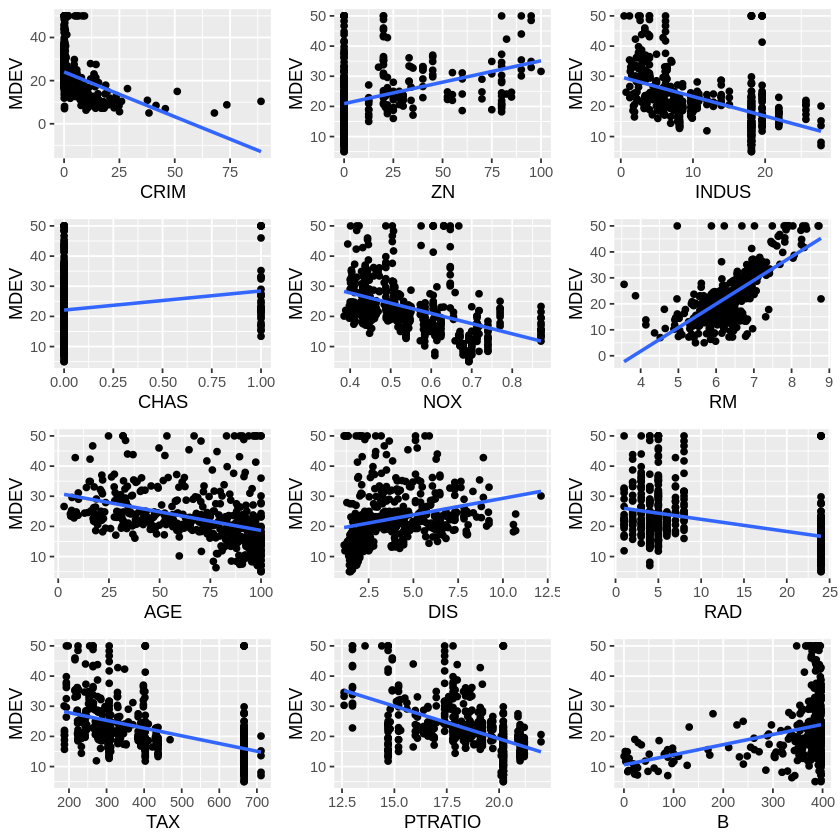

In [49]:

a<-ggplot(housing_data,aes(x = CRIM,y = MEDV))+geom_point()+    
        geom_smooth(method=lm, se=FALSE) + xlab("CRIM")+ ylab("MDEV")

b<-ggplot(housing_data,aes(x = ZN,y = MEDV))+geom_point()+    
        geom_smooth(method=lm, se=FALSE) + xlab("ZN")+ ylab("MDEV")

c<-ggplot(housing_data,aes(x = INDUS,y = MEDV))+geom_point()+    
        geom_smooth(method=lm, se=FALSE) + xlab("INDUS")+ ylab("MDEV")

d<-ggplot(housing_data,aes(x = CHAS,y = MEDV))+geom_point()+    
        geom_smooth(method=lm, se=FALSE) + xlab("CHAS")+ ylab("MDEV")

e<-ggplot(housing_data,aes(x = NOX,y = MEDV))+geom_point()+    
        geom_smooth(method=lm, se=FALSE) + xlab("NOX")+ ylab("MDEV")

f<-ggplot(housing_data,aes(x = RM,y = MEDV))+geom_point()+    
        geom_smooth(method=lm, se=FALSE) + xlab("RM")+ ylab("MDEV")

g<-ggplot(housing_data,aes(x = AGE,y = MEDV))+geom_point()+    
        geom_smooth(method=lm, se=FALSE) + xlab("AGE")+ ylab("MDEV")

h<-ggplot(housing_data,aes(x = DIS,y = MEDV))+geom_point()+    
        geom_smooth(method=lm, se=FALSE) + xlab("DIS")+ ylab("MDEV")

i<-ggplot(housing_data,aes(x = RAD,y = MEDV))+geom_point()+    
        geom_smooth(method=lm, se=FALSE) + xlab("RAD")+ ylab("MDEV")

j<-ggplot(housing_data,aes(x = TAX,y = MEDV))+geom_point()+    
        geom_smooth(method=lm, se=FALSE) + xlab("TAX")+ ylab("MDEV")

k<-ggplot(housing_data,aes(x = PTRATIO,y = MEDV))+geom_point()+    
        geom_smooth(method=lm, se=FALSE) + xlab("PTRATIO")+ ylab("MDEV")

l<-ggplot(housing_data,aes(x = B,y = MEDV))+geom_point()+    
        geom_smooth(method=lm, se=FALSE) + xlab("B")+ ylab("MDEV")

m<-ggplot(housing_data,aes(x = LSTAT,y = MEDV))+geom_point()+    
        geom_smooth(method=lm, se=FALSE) + xlab("LSTAT")+ ylab("MDEV")

grid.arrange(a,b,c,d,e,f,g,h,i,j,k,l, ncol= 3)





### **Question 4**: Identify the variables which have a correlation of greater than 0.45 and less than -0.45  with `MEDV`.

In [63]:
# Execute your code for question 4 here
# -------------------------------------
z <- cor(housing_data, use="pairwise.complete.obs", method="pearson")
df1 <- as.data.frame(as.table(z))
co <- subset(df1, Freq > .45 | Freq < -.45)
dplyr::filter(co, grepl("MEDV",Var2))

Var1,Var2,Freq
<fct>,<fct>,<dbl>
INDUS,MEDV,-0.4841258
RM,MEDV,0.6953645
TAX,MEDV,-0.4685432
PTRATIO,MEDV,-0.5084108
LSTAT,MEDV,-0.7381872
MEDV,MEDV,1.0000000


**Question 5**: Draw individual scatter plots for variables which are identified in above question.

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



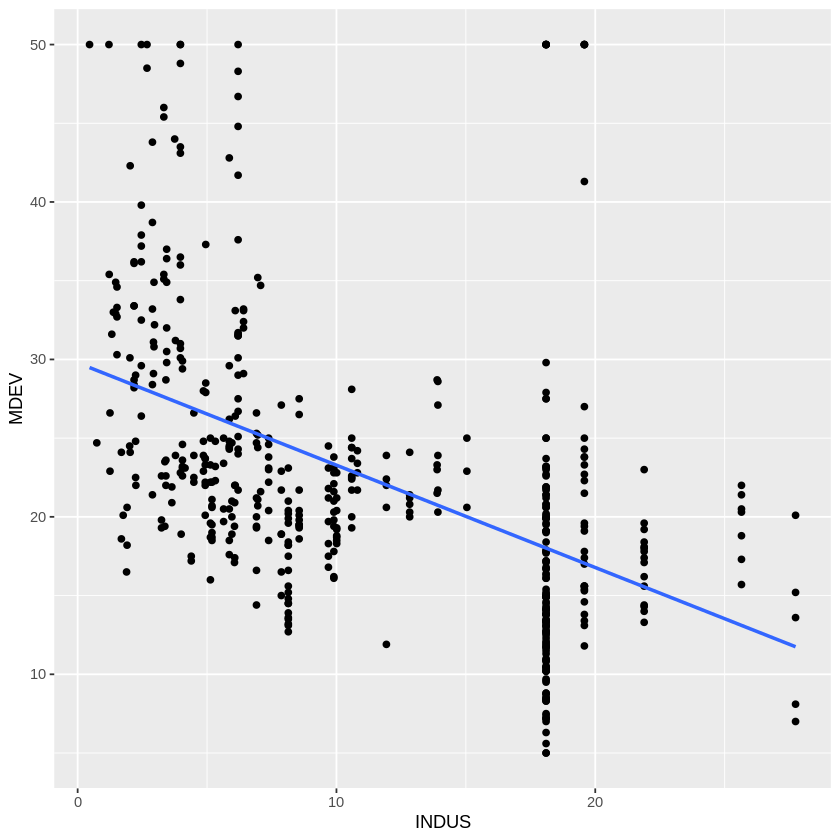

`geom_smooth()` using formula 'y ~ x'



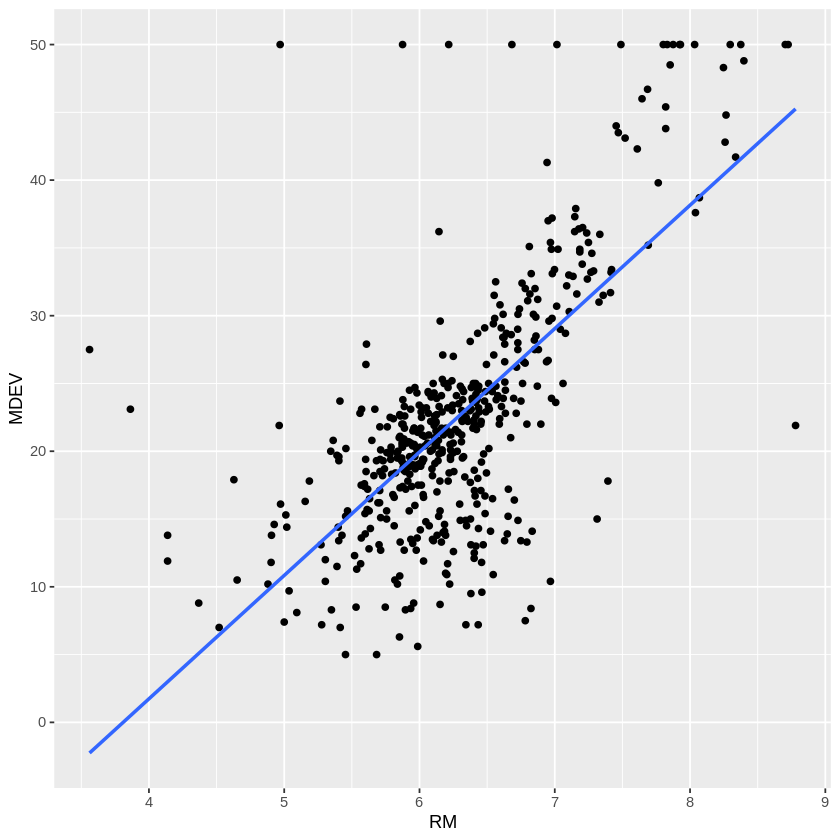

`geom_smooth()` using formula 'y ~ x'



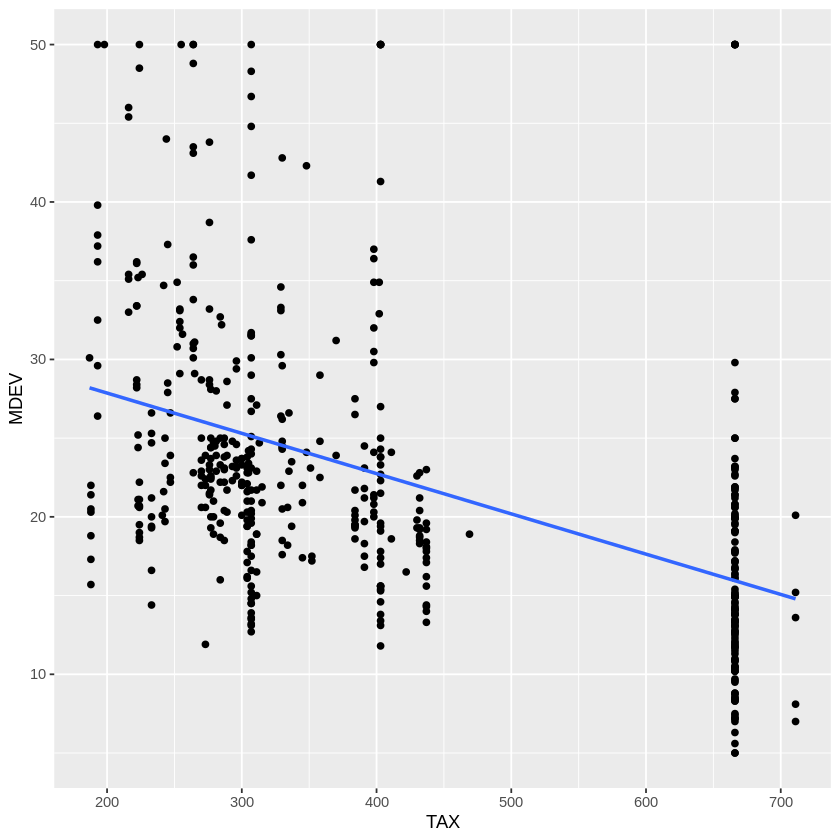

`geom_smooth()` using formula 'y ~ x'



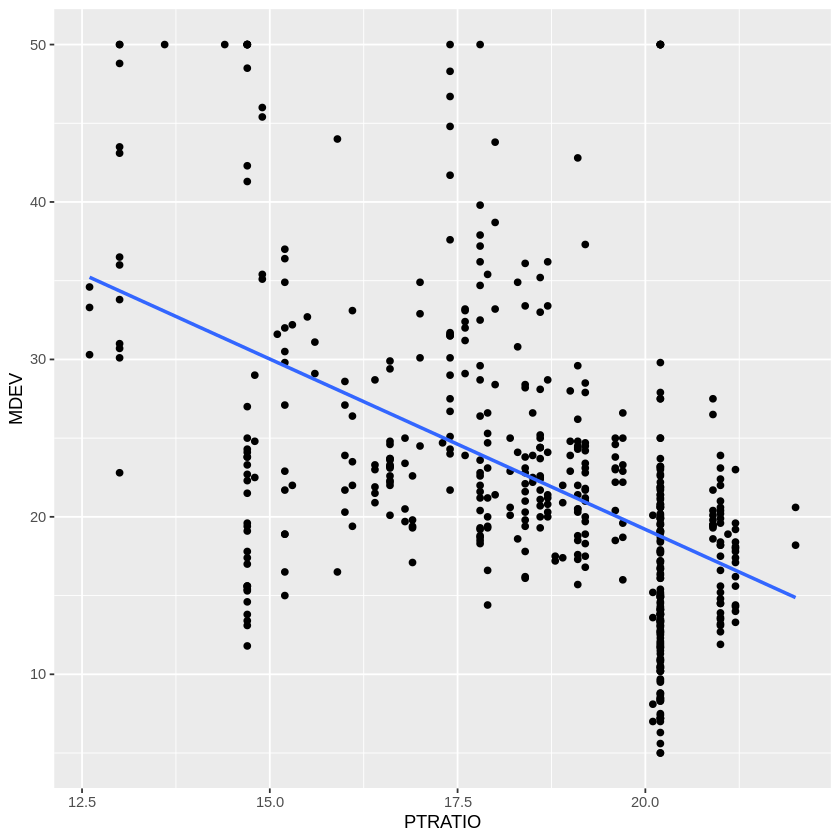

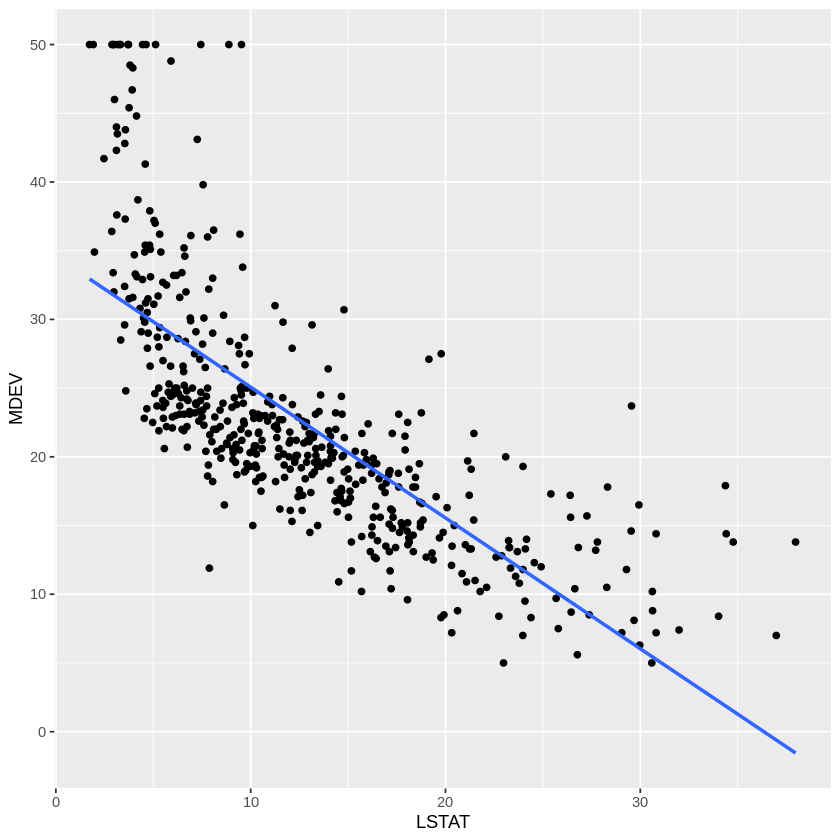

In [64]:
# Execute your code for question 5 here
# -------------------------------------
ggplot(housing_data,aes(x = INDUS,y = MEDV))+geom_point()+    
        geom_smooth(method=lm, se=FALSE) + xlab("INDUS")+ ylab("MDEV")

ggplot(housing_data,aes(x = RM,y = MEDV))+geom_point()+    
        geom_smooth(method=lm, se=FALSE) + xlab("RM")+ ylab("MDEV")

ggplot(housing_data,aes(x = TAX,y = MEDV))+geom_point()+    
        geom_smooth(method=lm, se=FALSE) + xlab("TAX")+ ylab("MDEV")

ggplot(housing_data,aes(x = PTRATIO,y = MEDV))+geom_point()+    
        geom_smooth(method=lm, se=FALSE) + xlab("PTRATIO")+ ylab("MDEV")


ggplot(housing_data,aes(x = LSTAT,y = MEDV))+geom_point()+    
        geom_smooth(method=lm, se=FALSE) + xlab("LSTAT")+ ylab("MDEV")


The scatter plot between MEDV and RM has caught my attention. 
Let's see what is interesting about it. 

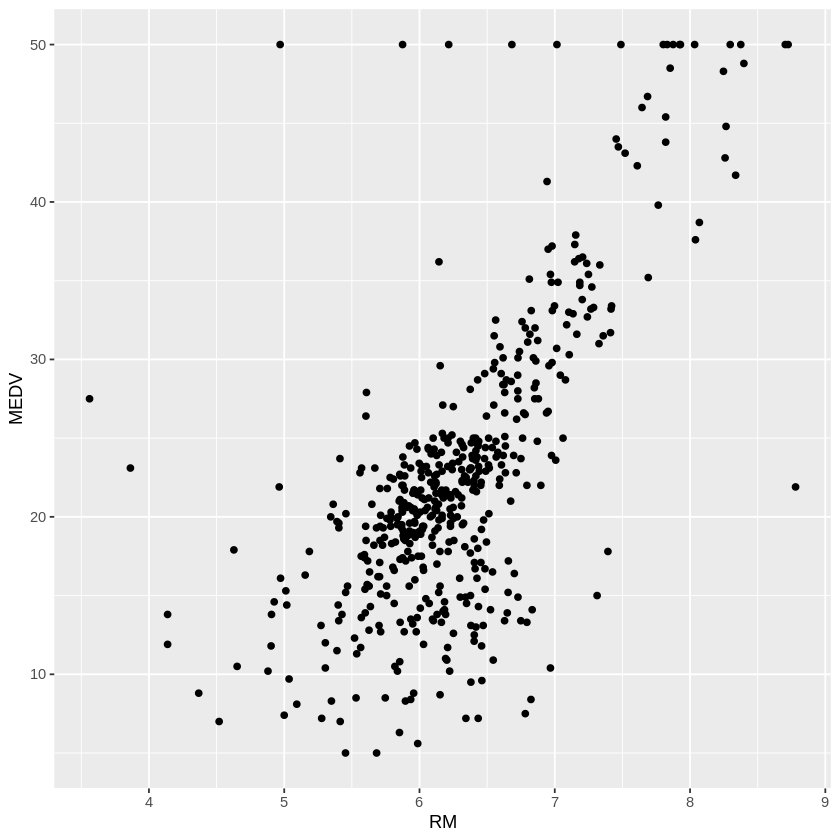

In [65]:
ggplot(housing_data,aes(x=RM, y=MEDV))+geom_point()

When we look at the median home value, there seem to exist some outliers that are set to $50,000 for 16 rows. 
They could be outliers in the dataset. 

**Question 6**: Remove the rows from the dataset where the MEDV value is set to $50,000. 

In [67]:
# Execute your code for question 6 here
# -------------------------------------
housing_data_b <- subset(housing_data, MEDV != 50)
housing_data_b

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


**Question 7**: Draw a scatter plot with RM on x-axis, MEDV on y-axis. Feed INDUS to size parameter and TAX to color parameter.

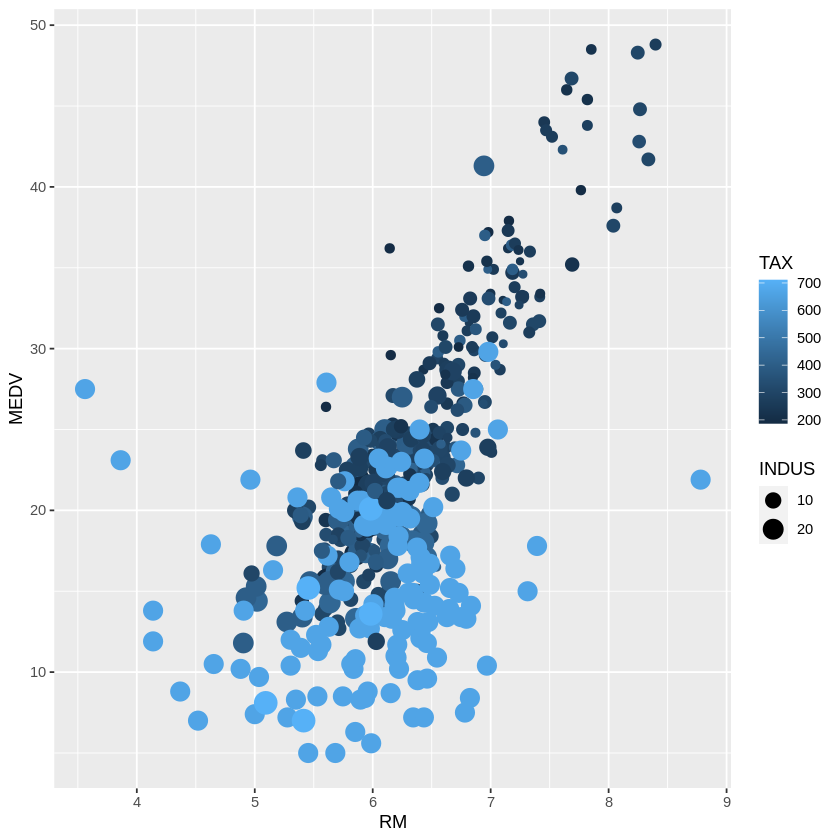

In [70]:
# Execute your code for question 7 here
# -------------------------------------
 ggplot(housing_data_b, aes(x=RM,y=MEDV)) + xlab("RM")+ ylab("MEDV") + 
    geom_point(aes(colour =TAX, size = INDUS))
    

We want to include LSTAT and PTRATIO variables in the map because both have a correlation of  more than 50%. But we can only use shape parameter as our fifth dimension. Variables INDUS and TAX tell us the same story. If there are more industries in the area, the taxes will be high. So we will exclude TAX from our analysis.

**Question 8**: Draw a scatter plot with LSTAT on x-axis, MEDV on y-axis. Feed INDUS to size parameter and RM to shape parameter and PTRATIO to color parameter.

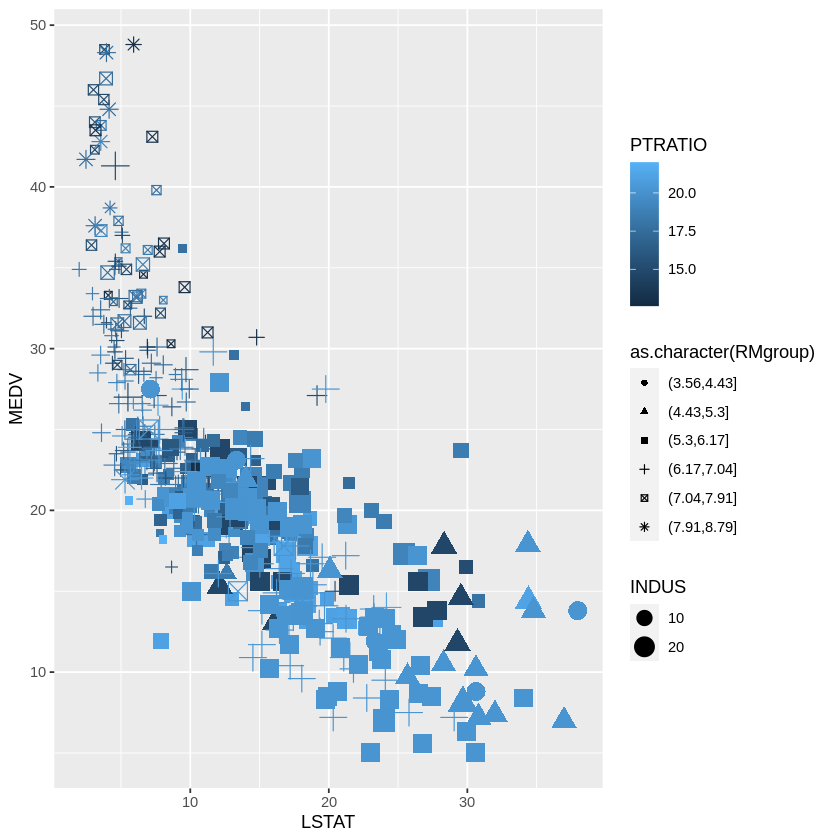

In [84]:
# Execute your code for question 8 here
# -------------------------------------
housing_data_b$RMgroup <- cut(housing_data_b$RM,6)

ggplot(housing_data_b, aes(x=LSTAT,y=MEDV)) + xlab("LSTAT")+ ylab("MEDV") + 
    geom_point(aes(colour = PTRATIO, size = INDUS, shape= as.character(RMgroup)))

**Question 9.a:** Fit a linear regression model to predict MEDV using the RM variable. 

In [85]:
# Execute your code for question 9 here
# -------------------------------------
fit <- lm(MEDV ~ RM, data = housing_data_b)
summary(fit)


Call:
lm(formula = MEDV ~ RM, data = housing_data_b)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.6950  -2.3051   0.4807   3.1715  28.0616 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -30.0079     2.4915  -12.04   <2e-16 ***
RM            8.2691     0.3968   20.84   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.73 on 487 degrees of freedom
Multiple R-squared:  0.4714,	Adjusted R-squared:  0.4703 
F-statistic: 434.3 on 1 and 487 DF,  p-value: < 2.2e-16


**Question 9.b:** What is the multiple R-squared value you got for the model?

**Question 10.a:** Fit a linear regression model to predict MEDV using all independent variables. What is the multiple R-squared value you got for the model.

In [87]:
# Execute your code for question 10 here
# -------------------------------------
fit2 <- lm(MEDV ~ RM + CRIM + ZN + INDUS + CHAS+ NOX + AGE+ DIS + RAD + TAX + PTRATIO + B + LSTAT, data = housing_data_b)
summary(fit2)


Call:
lm(formula = MEDV ~ RM + CRIM + ZN + INDUS + CHAS + NOX + AGE + 
    DIS + RAD + TAX + PTRATIO + B + LSTAT, data = housing_data_b)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2907  -2.3050  -0.5649   1.7341  15.8308 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  32.375261   4.121342   7.856 2.68e-14 ***
RM            3.748101   0.357146  10.495  < 2e-16 ***
CRIM         -0.106211   0.026087  -4.071 5.47e-05 ***
ZN            0.035064   0.011262   3.114 0.001960 ** 
INDUS        -0.049115   0.049917  -0.984 0.325651    
CHAS          0.438485   0.741105   0.592 0.554357    
NOX         -12.288267   3.055227  -4.022 6.71e-05 ***
AGE          -0.023335   0.010645  -2.192 0.028860 *  
DIS          -1.214366   0.160529  -7.565 2.03e-13 ***
RAD           0.247545   0.053109   4.661 4.09e-06 ***
TAX          -0.013542   0.003001  -4.512 8.10e-06 ***
PTRATIO      -0.843734   0.105351  -8.009 9.01e-15 ***
B             0.007850   0.0

**Question 10.b:** What is the multiple R-squared value you got for the model.

There is a significant increase in the model accuracy when all independent features are included in the model. 
But in the real world, this will lead to overfit of model. 
The model may do well on training dataset but may fail to make correct predictions on unknown test data. 
So it is better to fit a model with a right mix of most significant variables which can explain most variability 
in the data and at the same time not overfit the data. 

One common thing we can do is to remove features from the model which do not provide any new information, relative to existing features. 
Features which are correlated often provide the same amount and kind of information depending upon how much they are correlated. 
We can eliminate those kinds of redundant variables from the model. 

**Question 11.a:** Fit a linear regression model to predict MEDV using independent variables which have a correletion of greater than 0.45 or less than -0.45. What is the multiple R-squared value you got for this model.

In [88]:
# Execute your code for question 11 here
# -------------------------------------
fit3 <- lm(MEDV ~ RM + INDUS + TAX + PTRATIO + LSTAT, data = housing_data_b)
summary(fit3)


Call:
lm(formula = MEDV ~ RM + INDUS + TAX + PTRATIO + LSTAT, data = housing_data_b)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4885  -2.6947  -0.6577   2.1214  17.9209 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 18.698444   3.216122   5.814 1.11e-08 ***
RM           4.131936   0.366467  11.275  < 2e-16 ***
INDUS       -0.047905   0.043001  -1.114    0.266    
TAX         -0.006723   0.001700  -3.956 8.78e-05 ***
PTRATIO     -0.770333   0.100830  -7.640 1.18e-13 ***
LSTAT       -0.411198   0.040397 -10.179  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.106 on 483 degrees of freedom
Multiple R-squared:  0.7308,	Adjusted R-squared:  0.728 
F-statistic: 262.3 on 5 and 483 DF,  p-value: < 2.2e-16


**Question 11.b:** What is the multiple R-squared value you got for the model.

The model accuracy has reduced significantly on using only the highly correlated variables to fit the model. 
But it may work better on unknown test data. 
You can play around to add more independent variables that may increase the $R^2$. 

# SAVE YOUR NOTEBOOK